## 1.4-Supervised-learning-algorithms-pt1
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. Read weather-scaled-data & weather-answers-pleasant-data in as .csv
#### 3. Drop 'DATE' columns 
#### 4. Split data into training and test sets
#### 5. Run KNN model
#### 6. Utilize a multilabel confusion matrix
---------------------------------------------------------------------------------------------------------------------------
### 1. Import libraries, additional requirements and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\keanu\OneDrive\Desktop\Career Foundry\ClimateWins'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

---------------------------------------------------------------------------------------------------------------------------
### 2. Read weather-scaled-data & weather-answers-pleasant-data in as .csv

In [4]:
#Read in the scaled weather data.
scaled = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'scaled_temp_mean.csv'))
scaled

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.53,-1.02,-1.10,-0.11,-0.11,-0.93,-0.11,-0.18,-1.37,-0.10,-0.99,-0.27,-0.19,-1.28,-0.12,-0.39,-0.26,-0.67
1,19600102,1,-0.58,-1.11,-1.11,-0.37,-0.37,-0.83,-0.89,-0.21,-1.04,-0.23,-0.69,-0.35,-0.37,-0.54,-0.65,-0.42,-0.34,-0.55
2,19600103,1,-0.26,-1.08,-1.06,-0.51,-0.53,-0.94,-0.49,-0.39,-0.74,-0.49,-0.85,-0.40,-0.55,-0.88,-0.65,-0.62,-0.21,-0.07
3,19600104,1,-0.56,-1.21,-1.15,-0.53,-0.58,-1.04,-0.32,-0.49,-0.91,-0.47,-0.62,-0.64,-0.42,-0.78,-0.94,-0.76,-0.07,-1.00
4,19600105,1,-1.00,-1.21,-1.09,-0.32,-0.44,-0.98,-0.40,-0.55,-0.86,-0.31,-0.38,-0.91,-0.33,-0.93,-0.62,-0.50,-0.04,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.75,0.63,-0.01,0.90,1.04,0.44,0.91,-0.01,0.48,1.27,0.68,0.66,0.40,-0.00,0.83,0.52,1.30,-0.01
22946,20221028,10,0.86,0.37,-0.01,0.95,1.28,0.47,0.80,-0.01,0.26,1.31,0.56,0.89,0.54,-0.00,1.07,0.64,1.36,-0.01
22947,20221029,10,0.86,0.08,-0.01,0.91,1.10,0.79,0.92,-0.01,0.30,1.21,0.55,1.05,0.40,-0.00,1.22,0.72,1.41,-0.01
22948,20221030,10,0.68,0.27,-0.01,0.69,0.88,0.38,0.70,-0.01,0.40,0.92,0.10,0.69,-0.07,-0.00,1.24,0.02,0.67,-0.01


In [5]:
#Read in the scaled weather data.
answers = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------
### 3. Drop 'DATE' columns 

In [6]:
#Drop 3 non-pertinent columns #Create subset
df = scaled[['DATE', 'MONTH',
 'BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']]

df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.53,-1.02,-1.10,-0.11,-0.11,-0.11,-0.18,-1.37,-0.10,-0.99,-0.27,-0.19,-0.12,-0.39,-0.67
1,19600102,1,-0.58,-1.11,-1.11,-0.37,-0.37,-0.89,-0.21,-1.04,-0.23,-0.69,-0.35,-0.37,-0.65,-0.42,-0.55
2,19600103,1,-0.26,-1.08,-1.06,-0.51,-0.53,-0.49,-0.39,-0.74,-0.49,-0.85,-0.40,-0.55,-0.65,-0.62,-0.07
3,19600104,1,-0.56,-1.21,-1.15,-0.53,-0.58,-0.32,-0.49,-0.91,-0.47,-0.62,-0.64,-0.42,-0.94,-0.76,-1.00
4,19600105,1,-1.00,-1.21,-1.09,-0.32,-0.44,-0.40,-0.55,-0.86,-0.31,-0.38,-0.91,-0.33,-0.62,-0.50,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.75,0.63,-0.01,0.90,1.04,0.91,-0.01,0.48,1.27,0.68,0.66,0.40,0.83,0.52,-0.01
22946,20221028,10,0.86,0.37,-0.01,0.95,1.28,0.80,-0.01,0.26,1.31,0.56,0.89,0.54,1.07,0.64,-0.01
22947,20221029,10,0.86,0.08,-0.01,0.91,1.10,0.92,-0.01,0.30,1.21,0.55,1.05,0.40,1.22,0.72,-0.01
22948,20221030,10,0.68,0.27,-0.01,0.69,0.88,0.70,-0.01,0.40,0.92,0.10,0.69,-0.07,1.24,0.02,-0.01


In [7]:
df.to_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'scaled_temp_mean_new.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
### 4. Split data into training and test sets

In [8]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


---------------------------------------------------------------------------------------------------------------------------
### 5. Run KNN model

In [12]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #Accomodate a multilabel answer set
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #Change this line to accomodate multilabel
    test_acc[i] = knn.score(X_test, np.array(y_test)) #Change this line to accomodate multilabel

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


---------------------------------------------------------------------------------------------------------------------------

### 6. Utilize a multilabel confusion matrix

In [13]:
#Use a multilabel confusion matrix to plot all 15 matrices at once
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

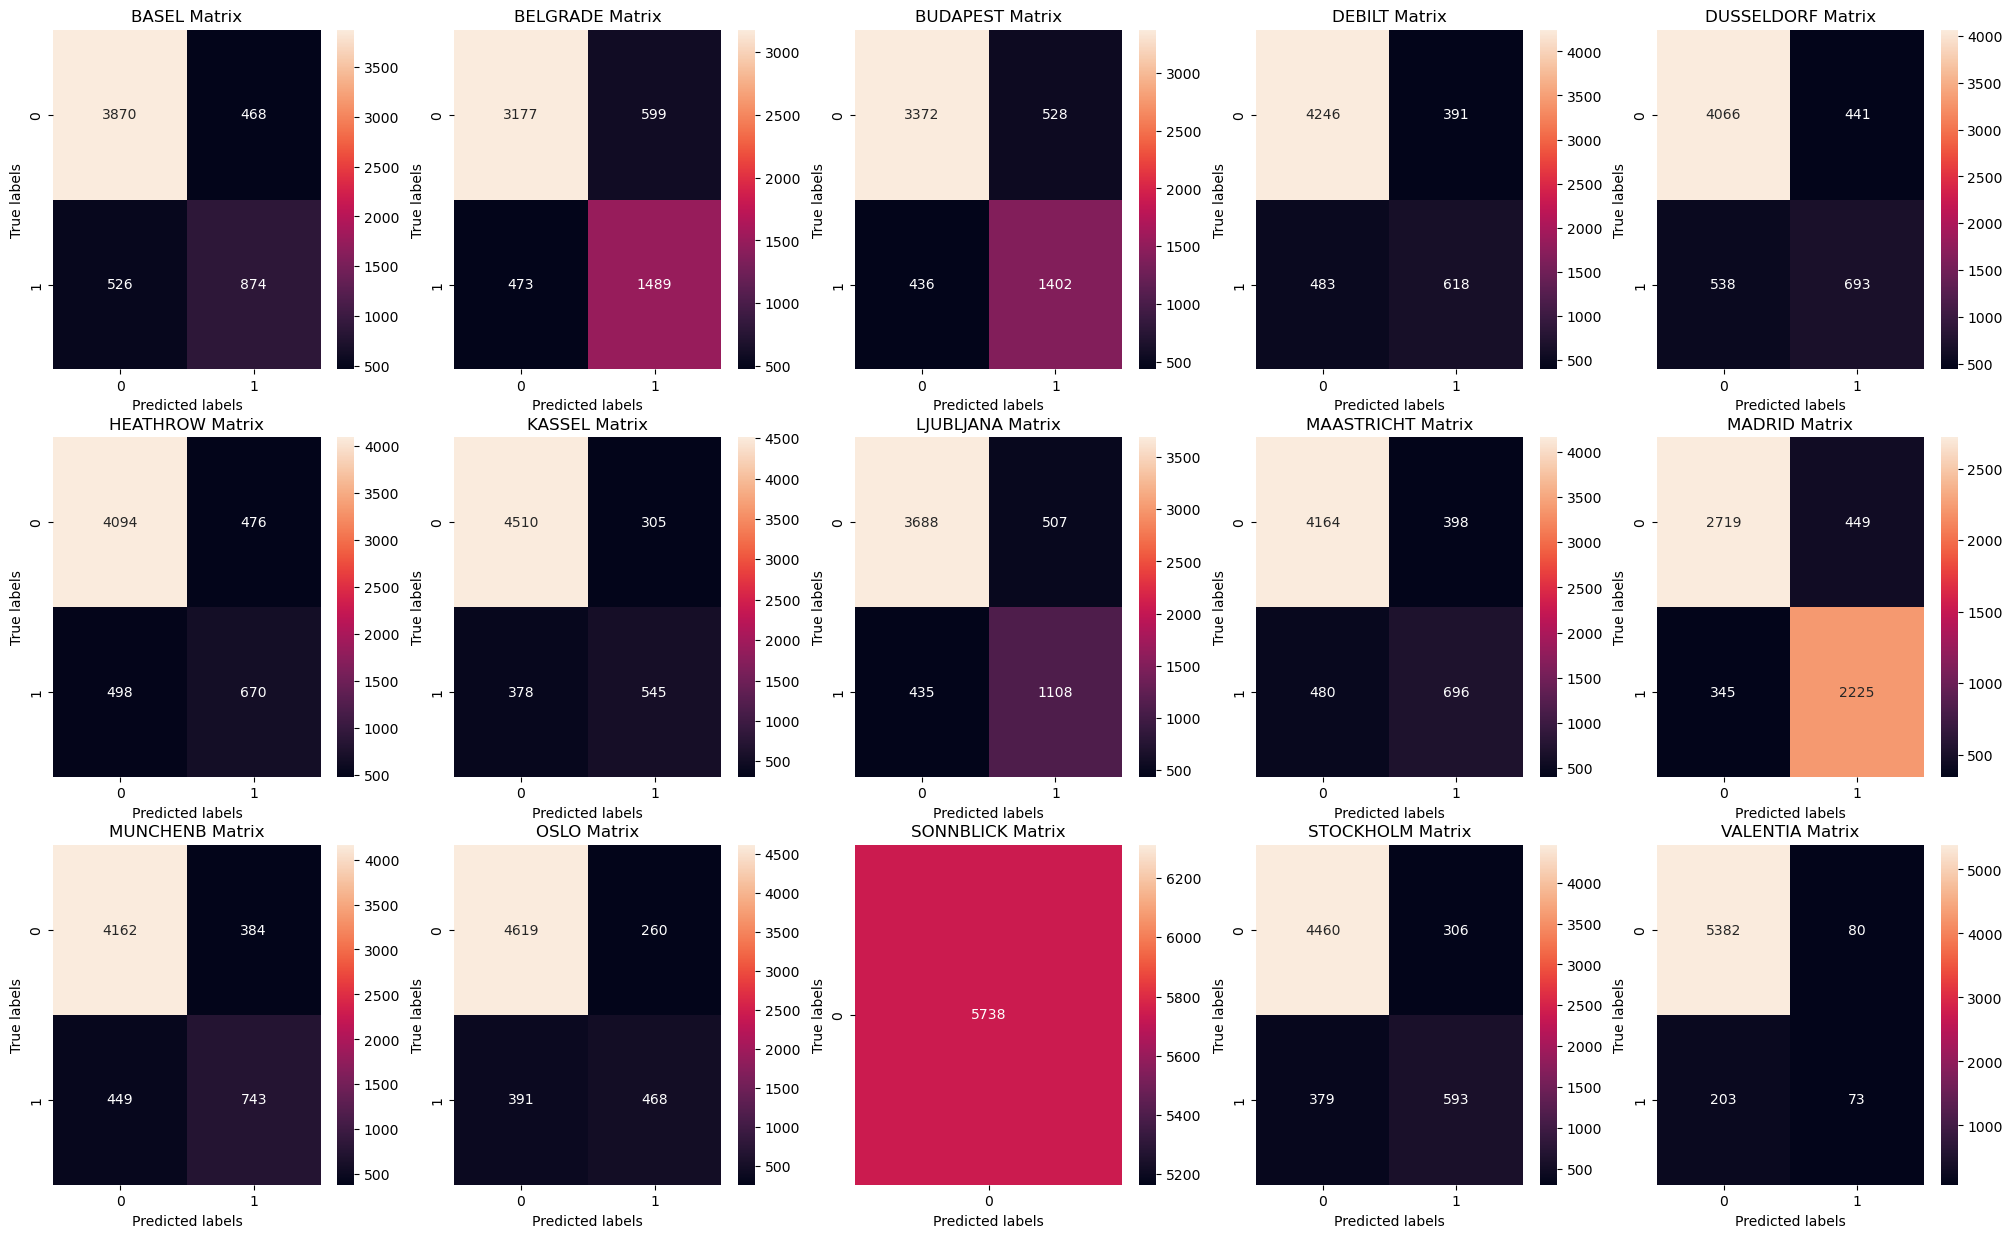

In [14]:
#Plot multilabel confusion matrix
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [15]:
answers['SONNBLICK_pleasant_weather'].value_counts(dropna=False)

SONNBLICK_pleasant_weather
0    22950
Name: count, dtype: int64

In [16]:
answers['VALENTIA_pleasant_weather'].value_counts(dropna=False)

VALENTIA_pleasant_weather
0    21776
1     1174
Name: count, dtype: int64

- **note:** Error occuring with SONNBLICK_pleasant_weather_answer due to having no ('pleasant weather attributes' = 1)
---------------------------------------------------------------------------------------------------------------------------